In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/data.csv')
print('df shape = {}'.format(df.shape))

# Desired control limits
ucl = 24 # Upper Control Limit
lcl = 21 # Lower Control Limit

df.head()

df shape = (30000, 201)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,response
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.331327
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.791539
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.482583
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.906473
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.444643


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 201 entries, feature_1 to response
dtypes: float64(201)
memory usage: 46.0 MB


In [4]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,response
count,5596.000000,5504.000000,5580.000000,5560.000000,5559.000000,5608.000000,5566.000000,5627.000000,5558.000000,5624.000000,...,5508.000000,5683.000000,5599.000000,5581.000000,5559.000000,5595.000000,5653.000000,5546.000000,10500.000000,30000.000000
mean,-0.049988,-0.030009,99.963088,50.076208,-11.385186,105.985351,-59.323253,-125.802191,-93.286980,136.630948,...,21.724107,-87.676903,98.400332,92.756896,-97.036914,131.127743,135.571455,114.755272,147.411487,22.506238
std,0.002013,0.001988,4.971948,5.035975,5.176511,8.741171,2.699908,1.048946,20.614858,29.329619,...,4.744468,6.147705,15.133076,19.099783,21.878910,11.074760,12.072761,6.630262,22.972507,0.909516
min,-0.057724,-0.037404,82.764507,28.542544,-31.091991,71.391283,-69.758132,-129.896331,-179.380218,42.849222,...,4.206891,-111.086762,47.780318,13.544308,-180.415655,93.912896,93.424235,86.533637,61.425273,18.842437
25%,-0.051328,-0.031351,96.654940,46.658592,-14.900162,100.190170,-61.125183,-126.519908,-106.751916,116.483997,...,18.474898,-91.739449,88.106674,80.134232,-111.541486,123.644465,127.223967,110.339222,131.751700,21.899864
50%,-0.049999,-0.029997,99.953156,50.056272,-11.358976,105.937091,-59.331936,-125.813184,-93.371040,136.600068,...,21.739611,-87.691227,98.117807,92.666595,-97.303217,131.135925,135.559924,114.634614,147.446940,22.511029
75%,-0.048656,-0.028657,103.327423,53.444281,-7.940067,111.815337,-57.467986,-125.078715,-79.163460,156.604027,...,24.918854,-83.647969,108.475953,105.528646,-82.525892,138.648356,143.619885,119.163837,162.766554,23.120200
max,-0.043073,-0.022886,117.084253,70.432492,8.643604,134.397908,-49.525436,-121.900874,-28.981557,244.166858,...,40.387937,-66.355070,151.325914,160.912889,-14.354053,170.603790,186.887618,141.026975,235.200831,25.981953


In [5]:
# Split features (X) and response (y)
X = df.iloc[:,:-1]
y = df['response']

# Split Train as first 80% (24K) rows and test as last 20% (6K) rows to simulate using past data to train and future data to test
X_train, X_test, y_train, y_test = X[:24000], X[24000:], y[:24000], y[24000:]

print('X_train, y_train, X_test, y_test shapes = {}, {}, {}, {}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train, y_train, X_test, y_test shapes = (24000, 200), (24000,), (6000, 200), (6000,)


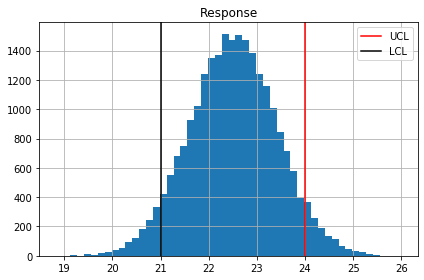

In [6]:
# Check the distribution of the y_train
y_train.hist(bins=50)
plt.axvline(ucl, color = 'r', label = 'UCL')
plt.axvline(lcl, color = 'k', label = 'LCL')
plt.legend()
plt.title('Response')
plt.tight_layout();

In [7]:
# Check % of missing data
min_missing = X_train.isna().sum().min()/X_train.shape[0]
max_missing = X_train.isna().sum().max()/X_train.shape[0]
print ('Min missing = {:.2f}% ; Max missing = {:.2f}% '.format(min_missing*100, max_missing*100))

Min missing = 65.23% ; Max missing = 81.98% 


In [21]:
# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Linear model
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV, Lasso
alphas = np.logspace(-6, -0.1, 100)
lr_model = LinearRegression()
lass_model = LassoCV(alphas=alphas, cv=3, max_iter=10000)
rid_model = RidgeCV(alphas=alphas, cv=3)
elas_model = ElasticNetCV(alphas=alphas, cv=3, max_iter=10000, l1_ratio=0.5)

# Cross Validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

# Pipeline
from sklearn.pipeline import Pipeline

# Metrics
from sklearn.metrics import mean_squared_error, r2_score

models = {'linear_regression': lr_model, 'lasso': lass_model, 'ridge': rid_model, 'elastic_net': elas_model}

In [19]:
for model, estimator in models.items():
    model_pipeline = Pipeline([
        ('imputer', imputer), 
        ('scaling', scaler),
        (model, estimator)
        ])
    
    alpha, RMSE, R2 = [], [], []
    
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
        model_pipeline.fit(X_train_fold, y_train_fold)
        
        if hasattr(model_pipeline.named_steps[model], 'alpha_'):
            alpha.append(model_pipeline.named_steps[model].alpha_)
        else:
            alpha.append(0)
        
        y_pred = model_pipeline.predict(X_val_fold)
        RMSE.append(mean_squared_error(y_val_fold, y_pred)**0.5)
        R2.append(r2_score(y_val_fold, y_pred))
       
    print('{} Alpha mean: {:.4f}; stddev: {:.4f}'.format(model, np.mean(alpha), np.std(alpha)))
    print('{} RMSE mean: {:.4f}; stddev: {:.4f}'.format(model, np.mean(RMSE), np.std(RMSE)))
    print('{} R2 mean: {:.4f}; stddev: {:.4f}\n'.format(model, np.mean(R2), np.std(R2)))

linear_regression Alpha mean: 0.0000; stddev: 0.0000
linear_regression RMSE mean: 0.8222; stddev: 0.0137
linear_regression R2 mean: 0.1788; stddev: 0.0182

lasso Alpha mean: 0.0092; stddev: 0.0006
lasso RMSE mean: 0.8199; stddev: 0.0137
lasso R2 mean: 0.1834; stddev: 0.0176

ridge Alpha mean: 0.7943; stddev: 0.0000
ridge RMSE mean: 0.8222; stddev: 0.0137
ridge R2 mean: 0.1788; stddev: 0.0182

elastic_net Alpha mean: 0.0171; stddev: 0.0011
elastic_net RMSE mean: 0.8199; stddev: 0.0136
elastic_net R2 mean: 0.1833; stddev: 0.0175



The RMSEs are not great. In fact, the RMSEs are only ~0.1 lower than the std dev of the response. Let's dig deeper

RMSE: 0.8238
R2: 0.1936


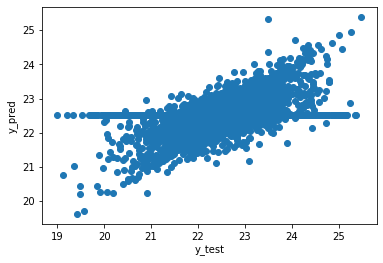

In [29]:
# Build individual Lasso model with best Alpha from above
final_pipeline = Pipeline([
        ('imputer', imputer), 
        ('scaling', scaler),
        ('lasso', Lasso(alpha = 0.0092))
        ])

final_pipeline.fit(X_train, y_train)

y_pred = final_pipeline.predict(X_test)
print('RMSE: {:.4f}'.format(mean_squared_error(y_test, y_pred)**0.5))
print('R2: {:.4f}'.format(r2_score(y_test, y_pred)))

plt.scatter(y_test, y_pred)
plt.ylabel('y_pred')
plt.xlabel('y_test');

In [30]:
# Find out which features Lasso uses to build the model
coef = pd.DataFrame(final_pipeline.named_steps['lasso'].coef_, columns=['coefficient'])
coef[coef['coefficient'] != 0]

,coefficient
0,0.208169
1,-0.205620
2,-0.206931
3,0.093546
60,-0.000601


In [37]:
# Drop rows that contain missing values in the features used by the Lasso model to prevent noise from Imputation
feature_cols = list(X_test.iloc[:,coef[coef['coefficient'] != 0].index].columns)
test_df = X_test.dropna(axis = 0, how='any', subset=feature_cols)
y_test = y_test[test_df.index]
test_df.shape

(227, 200)

RMSE: 0.1098
R2: 0.9861


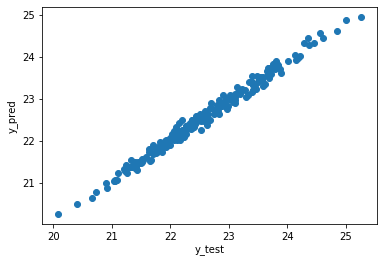

In [38]:
y_pred = final_pipeline.predict(test_df)
print('RMSE: {:.4f}'.format(mean_squared_error(y_test, y_pred)**0.5))
print('R2: {:.4f}'.format(r2_score(y_test, y_pred)))

plt.scatter(y_test, y_pred)
plt.ylabel('y_pred')
plt.xlabel('y_test');

Much better RMSE and R2 after removing the missing values from the features that are important to the model! <br>
Let's take a closer look at the 4 features used by the model

In [43]:
X_train[feature_cols].head()

,feature_1,feature_2,feature_3,feature_4,feature_61
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [45]:
coef[coef['coefficient'] != 0]

,coefficient
0,0.208169
1,-0.205620
2,-0.206931
3,0.093546
60,-0.000601
